## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('twitter_training.csv')


In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
# Skip the first row which is not the header
df = pd.read_csv('twitter_training.csv', encoding='utf-8', header=None, skiprows=1)

# Assign proper column names
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [5]:
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)
df.shape

(73995, 4)

In [8]:
df.drop_duplicates(inplace=True)    #remove all duplicate
df.duplicated().sum()               #count all duplicate

0

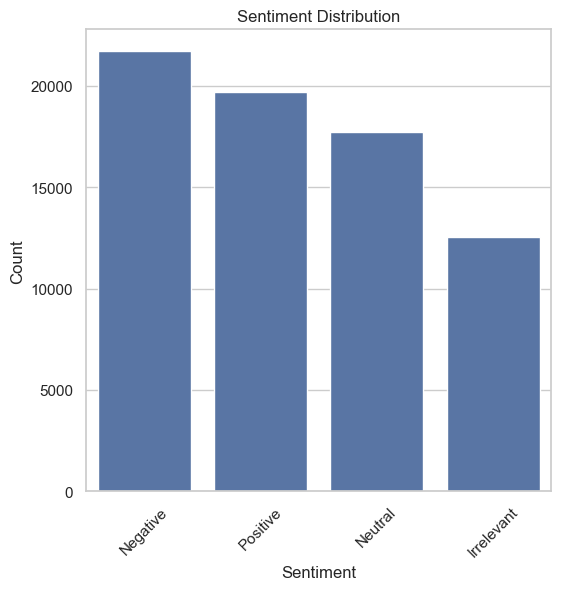

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x1200 with 0 Axes>

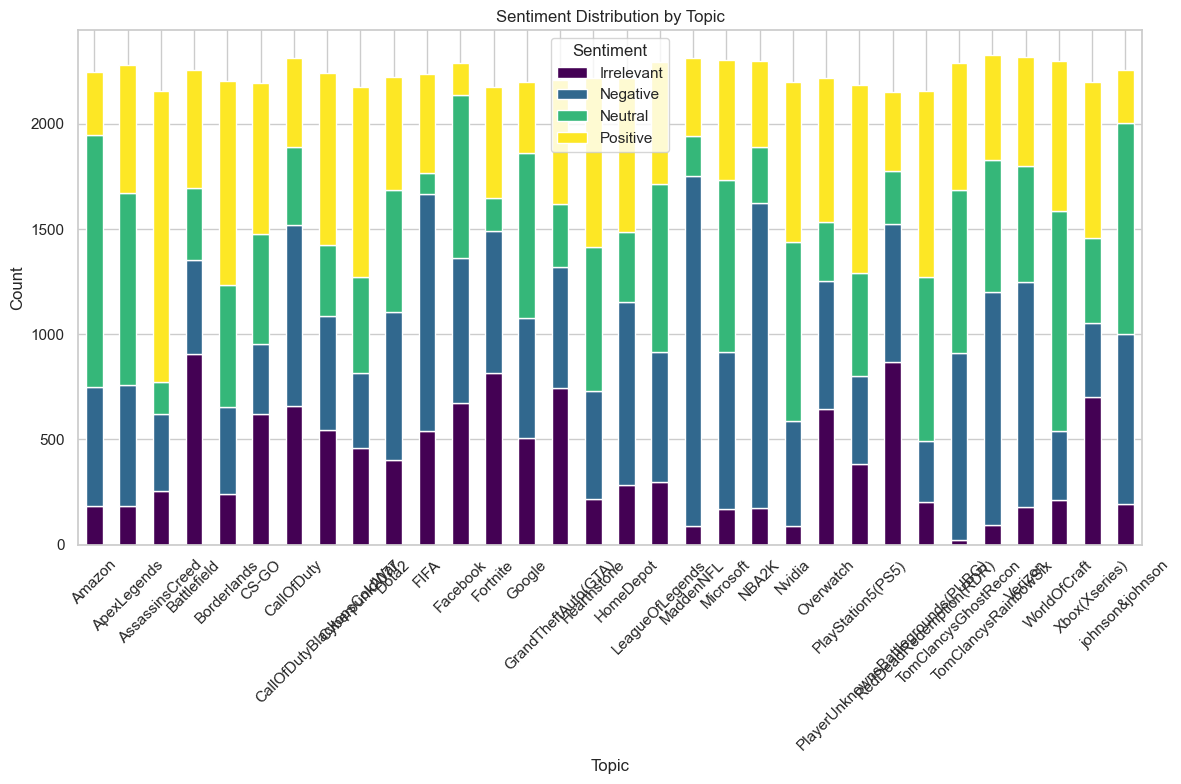

In [10]:
# Analyze sentiment patterns for specific topics
# Group by 'Topic' and 'Sentiment' to see the distribution of sentiments for each topic
sentiment_by_topic = df.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)

# Plot the sentiment distribution for each topic
plt.figure(figsize=(12, 12))
sentiment_by_topic.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

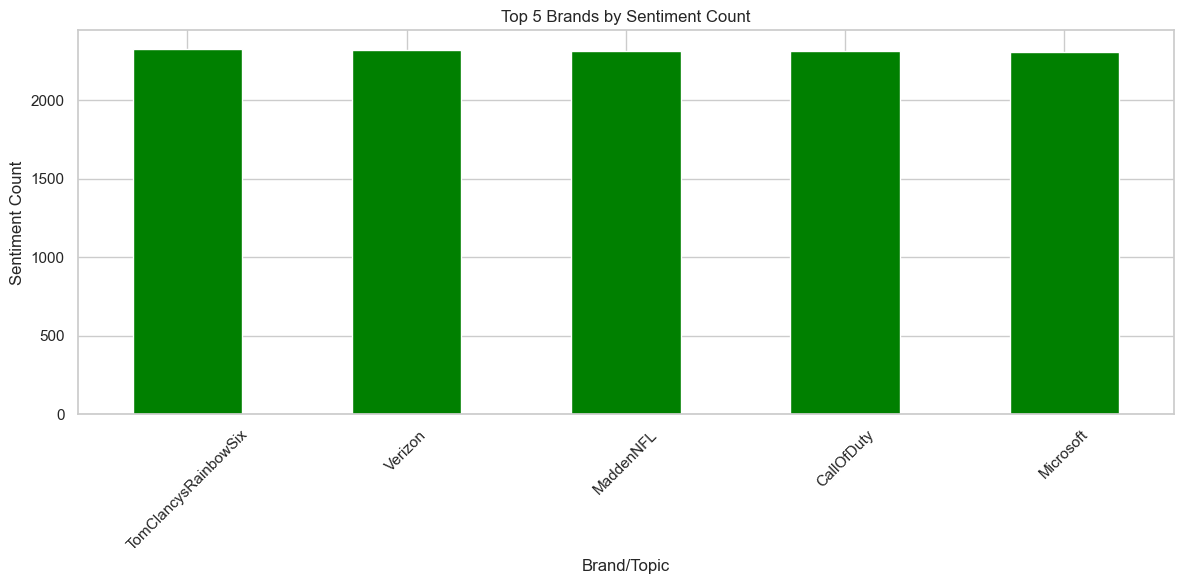

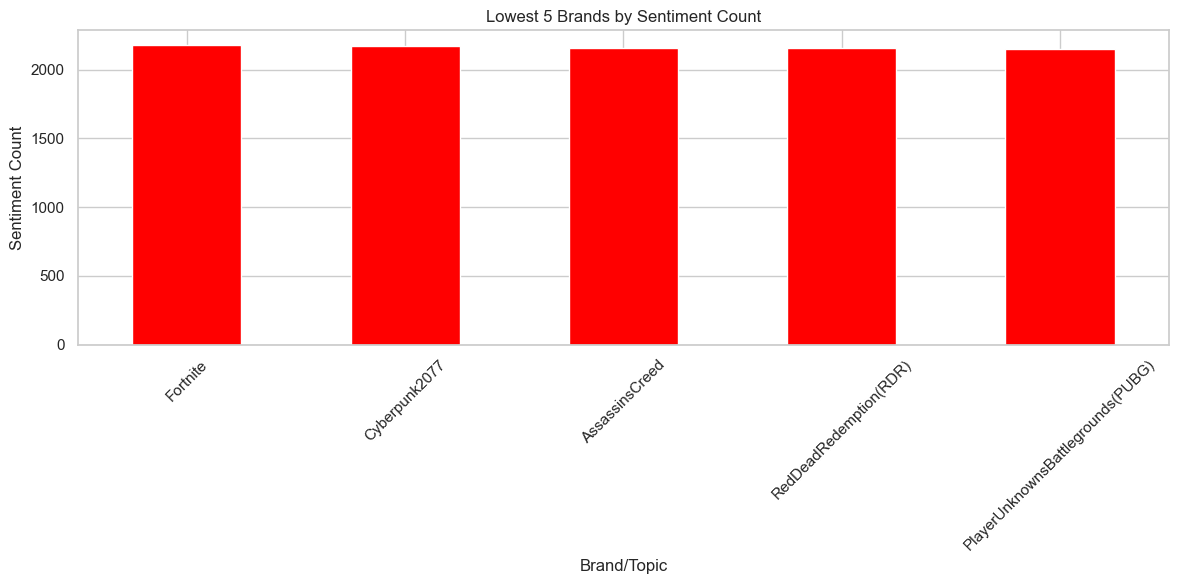

In [11]:
# Calculate the total sentiment counts for each brand/topic
brand_sentiment_counts = df.groupby('Topic')['Sentiment'].count().sort_values(ascending=False)

# Get the top 5 highest and lowest brands based on sentiment counts
top_5_brands = brand_sentiment_counts.head(5)
lowest_5_brands = brand_sentiment_counts.tail(5)

# Plot the top 5 highest brands
plt.figure(figsize=(12, 6))
top_5_brands.plot(kind='bar', color='green')
plt.title('Top 5 Brands by Sentiment Count')
plt.xlabel('Brand/Topic')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 5 lowest brands
plt.figure(figsize=(12, 6))
lowest_5_brands.plot(kind='bar', color='red')
plt.title('Lowest 5 Brands by Sentiment Count')
plt.xlabel('Brand/Topic')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()